Зименкова Анастасия Александровна

In [2]:
#Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

In [3]:
# 1) Загружаем данные MNIST
# Загружаем набор данных MNIST из OpenML
mnist = fetch_openml('mnist_784', version=1)


In [4]:
# Преобразуем данные в массивы numpy
X = mnist.data.values # Изображения
y = mnist.target.values.astype(int) # Классы

In [5]:
# Ограничиваемся 1000 примерами, выбираем их случайным образом
np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_sample = X[random_indices]
y_sample = y[random_indices]

In [6]:
# 2) Считаем среднее изображение для каждой цифры
average_images = np.zeros((10, 784))  # Массив для хранения средних изображений
counts = np.zeros(10)  # Массив для хранения числа примеров каждой цифры
for digit in range(10):
    digit_images = X_sample[y_sample == digit]  # Изображения текущей цифры
    average_images[digit] = digit_images.mean(axis=0)  # Среднее изображение
    counts[digit] = digit_images.shape[0]  # Число примеров этой цифры


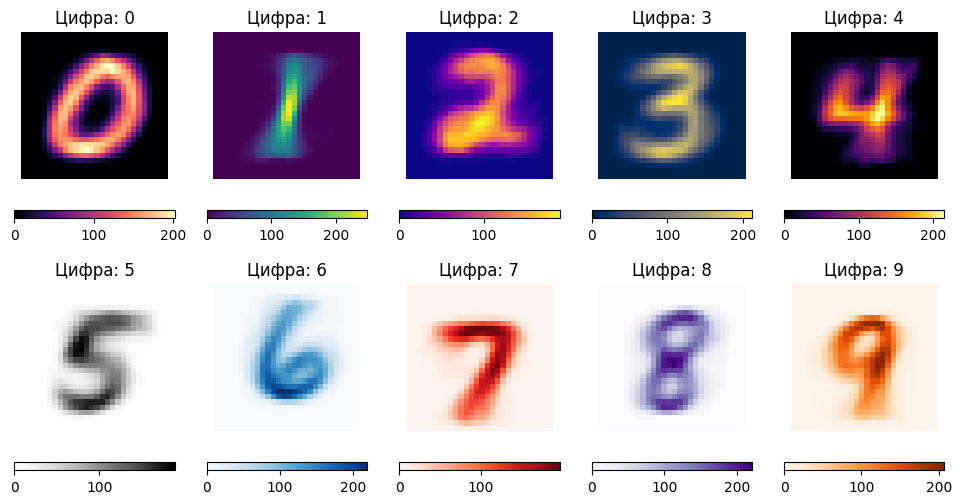

In [24]:
# 3) Выводим средние изображения на экран
cmap_list = ['magma', 'viridis', 'plasma', 'cividis', 'inferno', 'Greys', 'Blues', 'Reds', 'Purples', 'Oranges']
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(average_images[i].reshape(28, 28), cmap=cmap_list[i] )
    axes[i].set_title(f'Цифра: {i}')
    axes[i].axis('off')

# Добавляем colorbar для каждой цифры
plt.colorbar(axes[i].imshow(average_images[i].reshape(28, 28), cmap=cmap_list[i]), orientation='horizontal')
plt.colorbar(axes[0].imshow(average_images[0].reshape(28, 28), cmap=cmap_list[0]), orientation='horizontal')
plt.colorbar(axes[1].imshow(average_images[1].reshape(28, 28), cmap=cmap_list[1]), orientation='horizontal')
plt.colorbar(axes[2].imshow(average_images[2].reshape(28, 28), cmap=cmap_list[2]), orientation='horizontal')
plt.colorbar(axes[3].imshow(average_images[3].reshape(28, 28), cmap=cmap_list[3]), orientation='horizontal')
plt.colorbar(axes[4].imshow(average_images[4].reshape(28, 28), cmap=cmap_list[4]), orientation='horizontal')
plt.colorbar(axes[5].imshow(average_images[5].reshape(28, 28), cmap=cmap_list[5]), orientation='horizontal')
plt.colorbar(axes[6].imshow(average_images[6].reshape(28, 28), cmap=cmap_list[6]), orientation='horizontal')
plt.colorbar(axes[7].imshow(average_images[7].reshape(28, 28), cmap=cmap_list[7]), orientation='horizontal')
plt.colorbar(axes[8].imshow(average_images[8].reshape(28, 28), cmap=cmap_list[8]), orientation='horizontal')
plt.show()


In [18]:
# 4) Считаем максимальную и минимальную сумму значений всех пикселей изображения цифры
max_sums = np.zeros(10)  # Массив для хранения максимальных сумм
min_sums = np.zeros(10)  # Массив для хранения минимальных сумм

for digit in range(10):
    digit_images = X_sample[y_sample == digit]  # Изображения текущей цифры
    pixel_sums = digit_images.sum(axis=1)  # Сумма значений пикселей для каждого изображения
    max_sums[digit] = pixel_sums.max()  # Максимальная сумма
    min_sums[digit] = pixel_sums.min()  # Минимальная сумма

In [21]:
# 5) Оформляем данные в виде таблицы pandas
data = {
    'Цифра': np.arange(10),
    'Количество примеров': counts,
    'Максимальная сумма пикселей': max_sums,
    'Минимальная сумма пикселей': min_sums,}

df = pd.DataFrame(data)
display(df)

,Цифра,Количество примеров,Максимальная сумма пикселей,Минимальная сумма пикселей
0,0,95.0,62663.0,16903.0
1,1,104.0,34382.0,7874.0
2,2,95.0,49558.0,11506.0
3,3,119.0,57618.0,11492.0
4,4,88.0,45678.0,11524.0
5,5,90.0,40822.0,11949.0
6,6,97.0,48777.0,12657.0
7,7,103.0,36082.0,11404.0
8,8,101.0,69550.0,14807.0
9,9,108.0,52268.0,12080.0


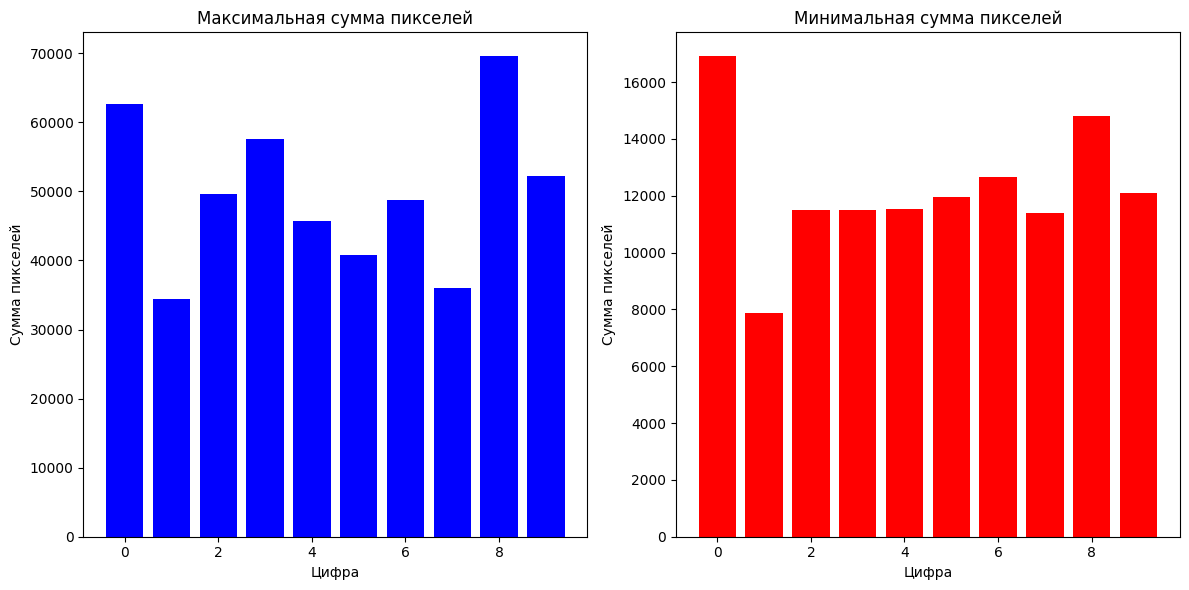

In [23]:
# Строим графики зависимости максимальной и минимальной суммы пикселей от номера цифры
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(df['Цифра'], df['Максимальная сумма пикселей'], color='blue')
plt.title('Максимальная сумма пикселей')
plt.xlabel('Цифра')
plt.ylabel('Сумма пикселей')

plt.subplot(1, 2, 2)
plt.bar(df['Цифра'], df['Минимальная сумма пикселей'], color='red')
plt.title('Минимальная сумма пикселей')
plt.xlabel('Цифра')
plt.ylabel('Сумма пикселей')

plt.tight_layout()
plt.show()